# Aula 06

Nesta aula, trabalharemos com dados que variam no tempo e espaço em uma grade regular (cube data).

Baixaremos os dados da plataforma https://disc.gsfc.nasa.gov/ e selecionaremos os dados da concentração de CO para 2024-1.

In [2]:
# Caminho para o arquivo

file_path = r"D:\Documentos\Doutorado\Python\python_env_app\dados\MERRA2_400.tavgU_2d_chm_Nx.202401.nc4"

# Abrindo o arquivo utilizando o netCDF4

import netCDF4 as nc

cubo_co = nc.Dataset(file_path, format="NETCDF4")
cubo_co



<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Contact: http://gmao.gsfc.nasa.gov
    History: Original file generated: Mon Feb 12 00:22:46 2024 GMT
    Filename: MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_chm_Nx.diurnal.202401.nc4
    Source: CVS tag: GEOSadas-5_12_4_p38_SLES12_M2-OPS experiment_id: d5124_m2_jan10
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TUNXCHM
    RangeBeginningDate: 2024-01-01
    RangeEndingDate: 2024-01-31
    GranuleID: MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    ProductionDateTime: Original file generated: Mon Feb 12 00:22:46 2024 GMT
    LongName: MERRA2 tavg1_2d_chm_Nx: 2d,3-Hourly,Time-Averaged,Sin

In [3]:
# Analisando uma variável dentro do NetCDF

cubo_co['COSC']

<class 'netCDF4.Variable'>
float32 COSC(time, lat, lon)
    long_name: CO Surface Concentration in ppbv __ENSEMBLE__
    units: 1e-9
    _FillValue: 1e+15
    missing_value: 1e+15
    fmissing_value: 1e+15
    vmax: 1e+15
    vmin: -1e+15
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (24, 361, 576)
filling on

In [6]:
# Analisando time

cubo_co['time']

<class 'netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: minutes since 2024-01-01 00:30:00
    time_increment: 10000
    begin_date: 20240101
    begin_time: 3000
    vmax: 1e+15
    vmin: -1e+15
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (24,)
filling on, default _FillValue of -2147483647 used

In [7]:
cubo_co.dimensions

{'lon': "<class 'netCDF4.Dimension'>": name = 'lon', size = 576,
 'lat': "<class 'netCDF4.Dimension'>": name = 'lat', size = 361,
 'time': "<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 24}

In [8]:
# Determinar o shape dos dados de concentração de CO na superfície

import numpy as np

np.shape(cubo_co['COSC'][:])

(24, 361, 576)

In [9]:
# Recortando dados 3D

cubo_co['COSC'][0:10,0,0]


masked_array(data=[36.97792 , 36.976906, 36.975487, 36.974518, 36.97156 ,
                   36.96897 , 36.963974, 36.958614, 36.9536  , 36.94954 ],
             mask=False,
       fill_value=np.float64(1e+20),
            dtype=float32)

In [10]:
# Recortar para uma região

cubo_co['COSC'][0,10:20,10:20]

masked_array(
  data=[[37.356953, 37.354435, 37.353424, 37.34763 , 37.3378  ,
         37.321167, 37.306297, 37.29647 , 37.29647 , 37.29773 ],
        [37.415924, 37.398537, 37.337296, 37.280846, 37.258163,
         37.260937, 37.26144 , 37.263706, 37.263958, 37.267487],
        [37.270763, 37.218094, 37.21683 , 37.219604, 37.220108,
         37.223133, 37.22414 , 37.228172, 37.232964, 37.23548 ],
        [37.199947, 37.200703, 37.200954, 37.201965, 37.20247 ,
         37.21381 , 37.230442, 37.234726, 37.233467, 37.232964],
        [37.194405, 37.1939  , 37.194405, 37.208767, 37.230442,
         37.24052 , 37.241783, 37.242287, 37.24254 , 37.243546],
        [37.188858, 37.198437, 37.21885 , 37.22616 , 37.227165,
         37.228676, 37.230442, 37.230694, 37.23901 , 37.24783 ],
        [37.214565, 37.22061 , 37.2191  , 37.21885 , 37.217083,
         37.217083, 37.22666 , 37.238506, 37.24279 , 37.24279 ],
        [37.25186 , 37.24808 , 37.243546, 37.239513, 37.250603,
         37.270008,

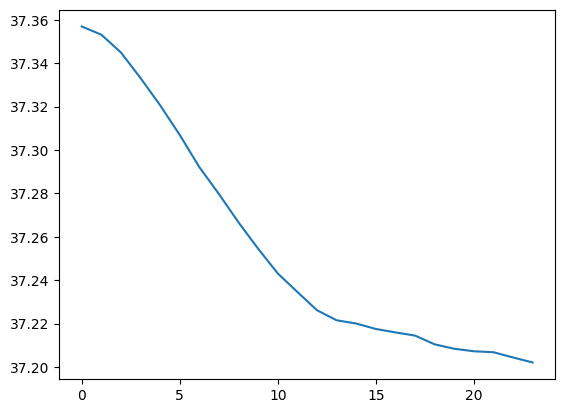

In [13]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(cubo_co['COSC'][:, 10,10])

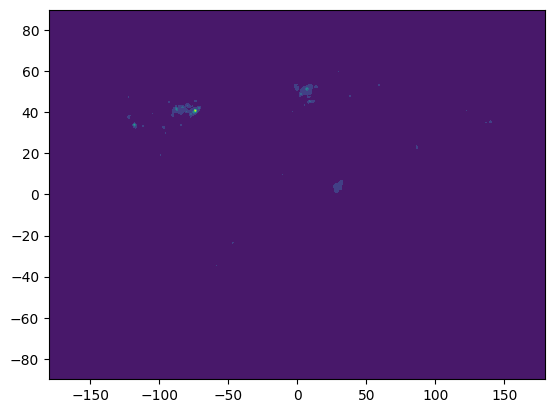

In [16]:
# Plot no espaço

fig, ax = plt.subplots()
ax.contourf(cubo_co['lon'][:], cubo_co['lat'][:], cubo_co['COSC'][0,:,:])

NameError: name 'colors' is not defined

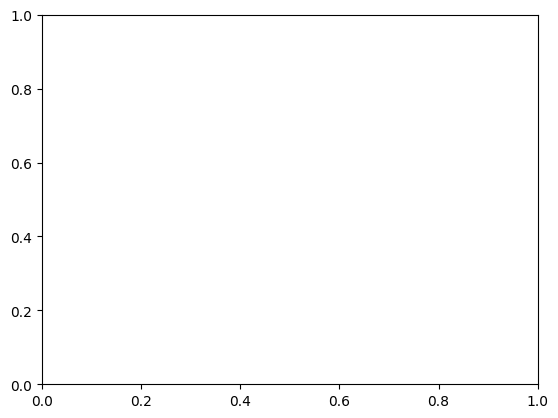

In [17]:
fig, ax = plt.subplots()
cs = ax.pcolor(cubo_co['lon'][:], cubo_co['lat'][:], cubo_co['COSC'][0,:,:], norm=colors.LogNorm(), cmap='viridis')

cbar = fig.colorbar(cs)
cbar.set_label('Z values (log scale)')

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

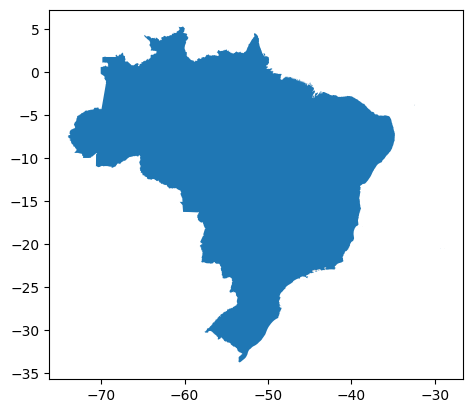

In [20]:
# Cortando para o Brasil
import rioxarray
import geopandas as gpd

br = gpd.read_file(r"D:\Documentos\Doutorado\Python\python_env_app\dados\BR_Pais_2024\BR_Pais_2024.shp")
br.plot()
br.crs


In [23]:
import xarray as xr

co = xr.open_dataset(file_path)
co

<xarray.Dataset> Size: 140MB
Dimensions:  (time: 24, lat: 361, lon: 576)
Coordinates:
  * time     (time) datetime64[ns] 192B 2024-01-01T00:30:00 ... 2024-01-01T23...
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    COCL     (time, lat, lon) float32 20MB ...
    COEM     (time, lat, lon) float32 20MB ...
    COLS     (time, lat, lon) float32 20MB ...
    COPD     (time, lat, lon) float32 20MB ...
    COSC     (time, lat, lon) float32 20MB ...
    LWI      (time, lat, lon) float32 20MB ...
    TO3      (time, lat, lon) float32 20MB ...
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Mon Feb 12 00...
    Filename:                          MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/5KFZ6GXRHZKN
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [24]:
# Extraindo o CRS do meu dado matricial

crs = co.rio.crs
print(crs)

None


In [25]:
# Forçando a implementação de um CRS no meu array

co.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
co.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset> Size: 140MB
Dimensions:      (time: 24, lat: 361, lon: 576)
Coordinates:
  * time         (time) datetime64[ns] 192B 2024-01-01T00:30:00 ... 2024-01-0...
  * lat          (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lon          (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
    spatial_ref  int64 8B 0
Data variables:
    COCL         (time, lat, lon) float32 20MB ...
    COEM         (time, lat, lon) float32 20MB ...
    COLS         (time, lat, lon) float32 20MB ...
    COPD         (time, lat, lon) float32 20MB ...
    COSC         (time, lat, lon) float32 20MB ...
    LWI          (time, lat, lon) float32 20MB ...
    TO3          (time, lat, lon) float32 20MB ...
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Mon Feb 12 00...
    Filename:                          MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/5KFZ6GXRHZKN
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [26]:
# Recortando

clipped = co.rio.clip(br.to_crs(crs='4326').buffer(0.1), 'EPSG:4326', drop=True)

C:\Users\Dayana\AppData\Local\Temp\ipykernel_21688\780299801.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped = co.rio.clip(br.to_crs(crs='4326').buffer(0.1), 'EPSG:4326', drop=True)


In [27]:
clipped

<xarray.Dataset> Size: 4MB
Dimensions:      (lon: 73, lat: 78, time: 24)
Coordinates:
  * lon          (lon) float64 584B -73.75 -73.12 -72.5 ... -30.0 -29.38 -28.75
  * lat          (lat) float64 624B -33.5 -33.0 -32.5 -32.0 ... 3.5 4.0 4.5 5.0
  * time         (time) datetime64[ns] 192B 2024-01-01T00:30:00 ... 2024-01-0...
    spatial_ref  int64 8B 0
Data variables:
    COCL         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    COEM         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    COLS         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    COPD         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    COSC         (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    LWI          (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
    TO3          (time, lat, lon) float32 547kB nan nan nan nan ... nan nan nan
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Mon Feb 12 00...
    Filename:                          MERRA2_400.tavgU_2d_chm_Nx.202401.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/5KFZ6GXRHZKN
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

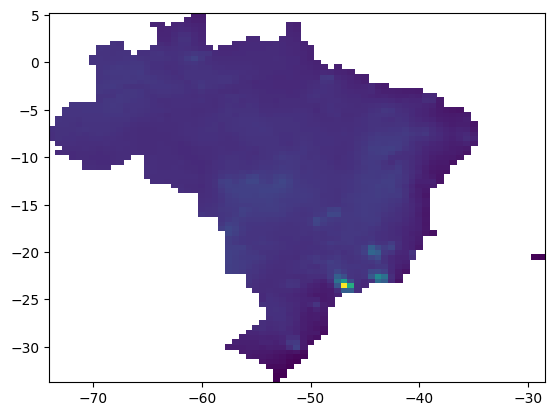

In [28]:
# Plotagem

fig, ax = plt.subplots()
ax.pcolor(clipped.lon, clipped.lat, clipped['COSC'][0,:,:])

In [32]:
# Estatistica no tempo espaço

np.nanmean(clipped['COSC'], axis=0)

np.nanmean(clipped['COSC'][:], axis=1)

C:\Users\Dayana\AppData\Local\Temp\ipykernel_21688\3135743712.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(clipped['COSC'], axis=0)
C:\Users\Dayana\AppData\Local\Temp\ipykernel_21688\3135743712.py:5: RuntimeWarning: Mean of empty slice
  np.nanmean(clipped['COSC'][:], axis=1)


array([[115.6178  , 117.414894, 117.85539 , ...,        nan,  49.506905,
         48.89551 ],
       [120.13888 , 121.981514, 122.62317 , ...,        nan,  49.526802,
         48.845604],
       [124.22726 , 126.21603 , 127.097305, ...,        nan,  49.538746,
         48.806385],
       ...,
       [102.61786 , 104.60432 , 105.2358  , ...,        nan,  49.43288 ,
         49.00395 ],
       [106.109215, 108.21905 , 108.668655, ...,        nan,  49.501774,
         48.99522 ],
       [110.91689 , 112.82727 , 113.26021 , ...,        nan,  49.550884,
         48.956882]], shape=(24, 73), dtype=float32)

C:\Users\Dayana\AppData\Local\Temp\ipykernel_21688\407356344.py:4: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(clipped['COSC'][:], axis=1))


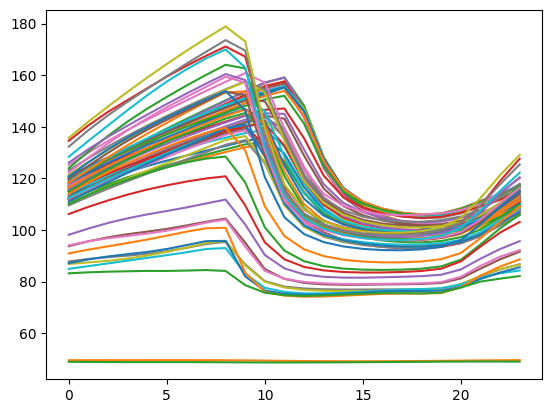

In [34]:
# Plotando

fig, ax = plt.subplots()
ax.plot(np.nanmean(clipped['COSC'][:], axis=1))

In [36]:
# Abrindo diversos Netcdfs

import os
allfiles = os.listdir(r"D:\Documentos\Doutorado\Python\python_env_app\dados")

files = [fname for fname in allfiles if fname.endswith('.nc4')]
files

['MERRA2_400.tavgU_2d_chm_Nx.202401.nc4']

In [37]:
#Movendo para o diretório com dados
import dask

os.chdir(r"D:\Documentos\Doutorado\Python\python_env_app\dados")
ds = xr.open_mfdataset(files, concat_dim= 'time', combine='nested')
ds

ImportError: chunk manager 'dask' is not available. Please make sure 'dask' is installed and importable.